In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pickle
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import warnings

In [2]:
df = pd.read_feather('data/dataset.feather')

<Axes: xlabel='DATE'>

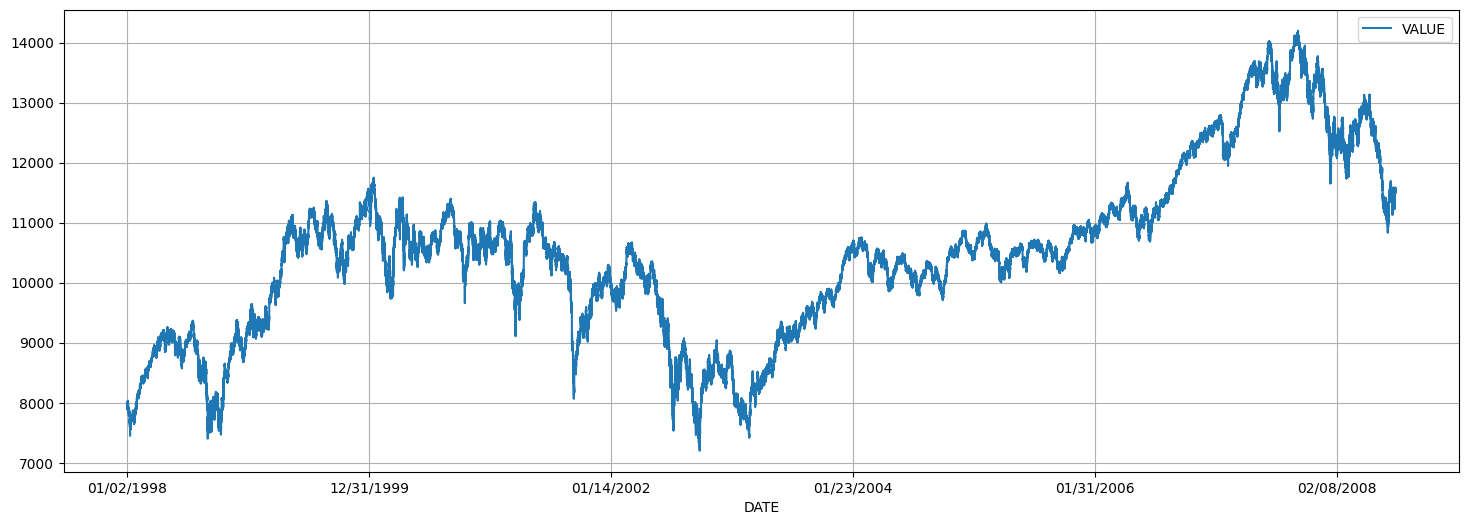

In [4]:
df.plot(x='DATE', y='VALUE', figsize=(18, 6), grid=True)

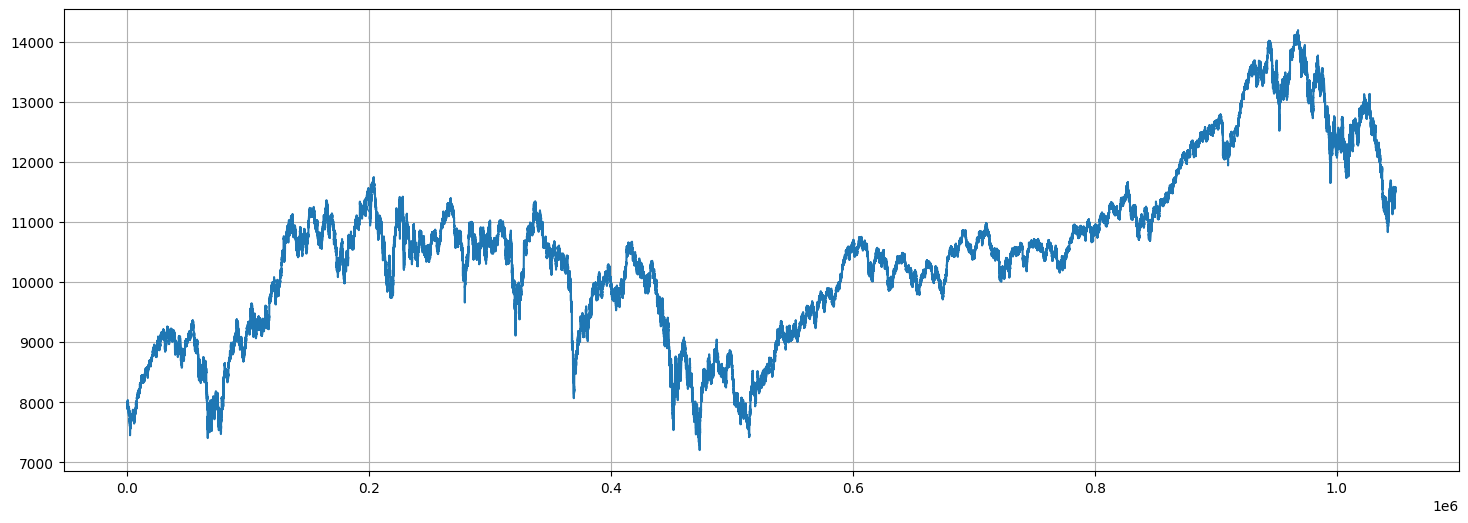

In [3]:
plt.figure(figsize=(18, 6))
plt.plot( df['VALUE'].tolist())
plt.grid(True)

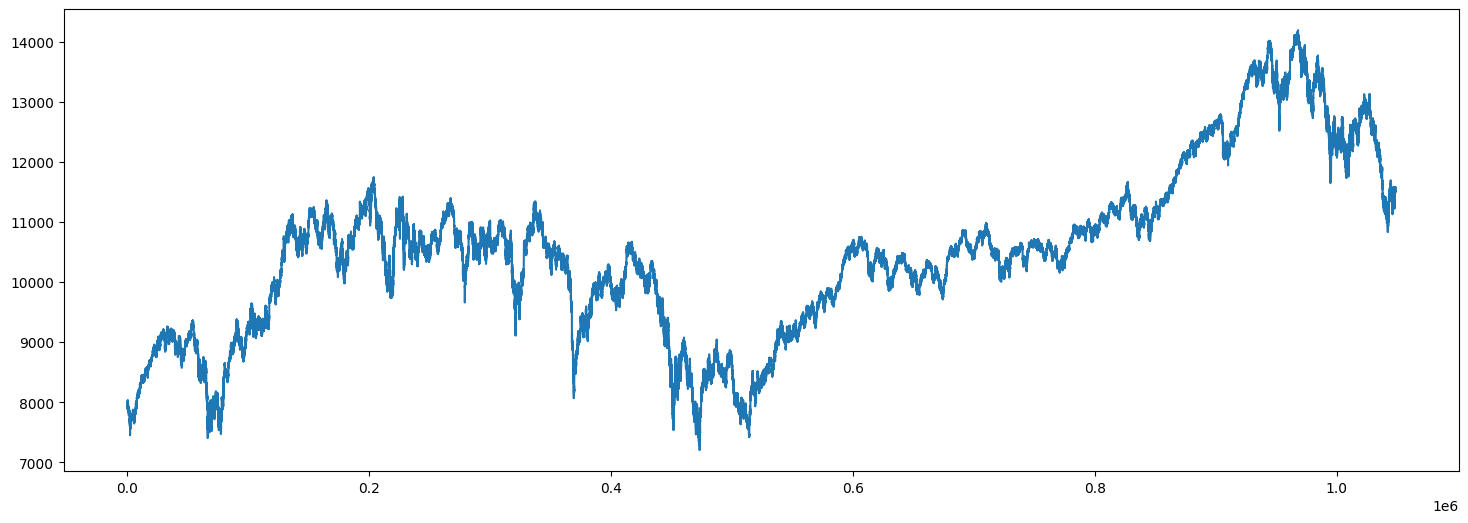

In [4]:
plt.figure(figsize=(18, 6))
plt.plot( df['VALUE'].dropna().tolist())

In [5]:
warnings.filterwarnings("ignore")

# Assuming you have already loaded your dataset as 'data_series'
# Perform ADF test to determine d
adf_test = adfuller(df['VALUE'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

# if p-value is greater than 0.05 we consider it non-stationary and start differencing
d = 0 if adf_test[1] <= 0.05 else 1


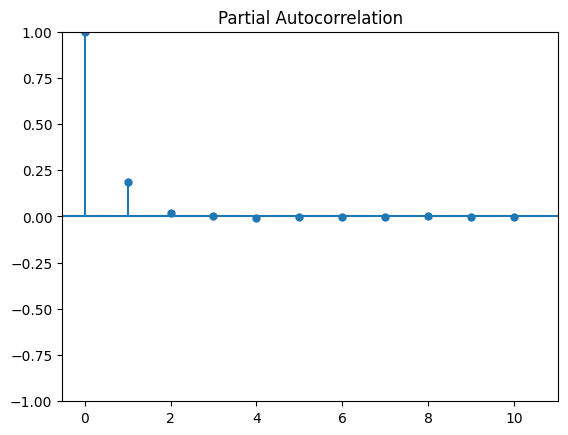

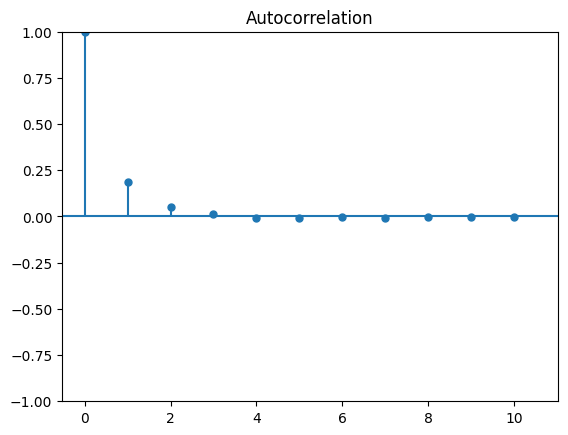

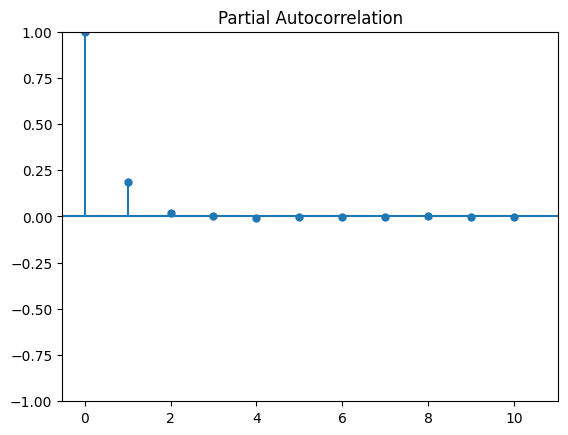

In [4]:

# Plot ACF and PACF to identify potential p and q
plot_acf(df['VALUE'].diff().dropna(), lags=10)  # Change lags as needed
plot_pacf(df['VALUE'].diff().dropna(), lags=10) # Change lags as needed

# identification of p and q here based on plots...


In [4]:
d = 1

# Model Selection based on AIC
p = range(0, 7) # example range, adjust based on plot observation
q = range(0, 4)
pdq = list(itertools.product(p, [d], q))

lowest_aic, best_pdq = float("inf"), None
for param in pdq:
    try:
        model = ARIMA(df['VALUE'], order=param)
        results = model.fit()
        if results.aic < lowest_aic:
            lowest_aic = results.aic
            best_pdq = param
    except:
        continue

print(f"Best model: ARIMA{best_pdq} - AIC:{lowest_aic}")


/usr/local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/site-packages/st

Best model: ARIMA(4, 1, 2) - AIC:6051415.80090534


In [7]:
model = ARIMA(df['VALUE'], order=best_pdq)
model_fit = model.fit()
# forecast = model_fit.forecast(steps=30)

In [8]:
# Print summary of the model
print(model_fit.summary())

# Save the trained ARIMA model to a file using pickle
with open('arima_model.pkl', 'wb') as pkl:
    pickle.dump(model_fit, pkl)

                               SARIMAX Results                                
Dep. Variable:                  VALUE   No. Observations:              1048575
Model:                 ARIMA(2, 1, 2)   Log Likelihood            -3025789.027
Date:                Fri, 22 Dec 2023   AIC                        6051588.054
Time:                        05:09:59   BIC                        6051647.369
Sample:                             0   HQIC                       6051604.347
                            - 1048575                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3992      0.219      1.825      0.068      -0.029       0.828
ar.L2         -0.0461      0.061     -0.759      0.448      -0.165       0.073
ma.L1         -0.2140      0.219     -0.979      0.3

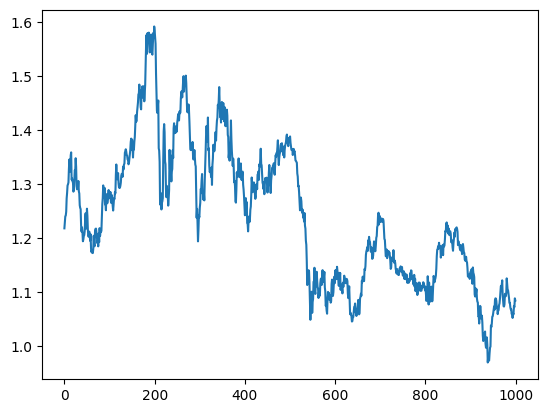

In [6]:
from src.utils import clean_list

sample_df = pd.read_excel('data/EURUSD_WEEKLY.xlsx', engine='openpyxl')
sample_value = sample_df[sample_df.columns[1]].tolist()
clean_list(sample_value)
plt.plot(sample_value)

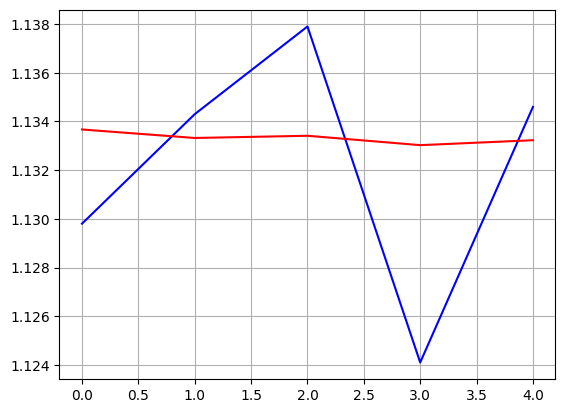

In [15]:
steps = 5
pdq = (7, 1, 2)
model = ARIMA(sample_value[:len(sample_value) - int(len(sample_value)/4)], order=pdq)
model_fit = model.fit()
forecast = model_fit.forecast(steps=steps)

# plt.figure(figsize=(18, 6))
plt.plot(sample_value[len(sample_value) - int(len(sample_value)/4): len(sample_value) - int(len(sample_value)/4) + steps], color='blue', label='Original')
plt.plot(forecast, color='red', label='Forecast')
plt.grid(True)
plt.savefig('image/arima_test.png')

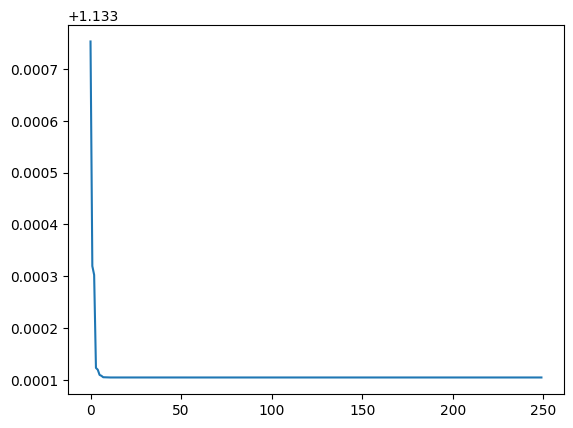

In [9]:
plt.plot(forecast)

In [18]:
import pmdarima as pm

In [41]:
model = pm.ARIMA((2, 1, 2))
model.fit(sample_value[:len(sample_value) - int(len(sample_value)/4)])

ARIMA(order=(2, 1, 2))

In [42]:
y_fit = model.predict_in_sample()
y_predict = model.predict(int(len(sample_value)/4))

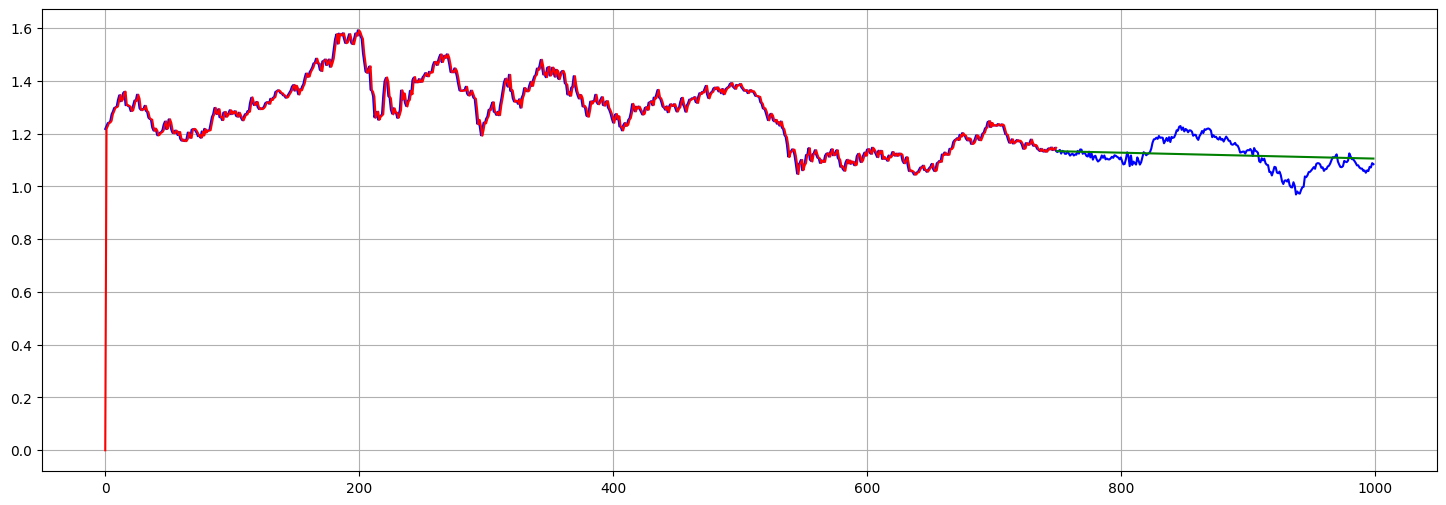

In [43]:
plt.figure(figsize=(18, 6))
# plt.plot(y_fit)
plt.plot(sample_value, color='blue', label='Original')
plt.plot(y_fit, color='red', label='Forecast')
plt.plot(np.arange(len(sample_value) - int(len(sample_value)/4), len(sample_value)), y_predict, color='green', label='Test')
plt.grid(True)
plt.savefig('image/arima_test.png')